<a href="https://colab.research.google.com/github/Nawafprojects01/Customer-Segmentation-ML-AND-DS-Project/blob/main/Data_science_Customer_Personality_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nawaf Alzahrani
 Nawaf4zh5@gmail.com

[linkedIn](https://www.linkedin.com/in/nawaf-alzahrani-profile/)

[X](https://x.com/Nawaf_Ron)








# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, my responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment **This project was structured into key business and analytical questions, with each question representing a critical step in the data science workflow and providing clear, data-driven answers** .  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
# uncomment and run the following line if using Google Colab, if you are just watching then keep going :)
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv", sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [ ]:
# creating a copy of the data
data = data.copy()

## **Data Overview**

#### Viewing the first and last 5 rows of the dataset

In [ ]:
data.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [ ]:
data.tail(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
2235             0             0         0              3         11         0  
2236             1             0         0              3         11         0  
2237             0             0         0              3         11         0  
2238             0             0         0              3         11         0  
2239             0             0         0              3         11         1

#### Calculating the age of the customer using the "Year Birth"

In [ ]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate the age of the customer
data['Age'] = current_year - data['Year_Birth']

In [ ]:
data.shape

(2240, 30)

- The dataset has 2240 rows and 30 columns.

#### **Question 1**: What are the data types of all the columns?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
# Get summary statistics
data.describe()

# Get the average income
avg_income = data['Income'].mean()
print(f"Average Household Income: {avg_income:.2f}")


Average Household Income: 52247.25


#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Print missing values
print("Missing values in each column:\n")
print(missing_values)

#  Check if the dataset has any missing values at all
if missing_values.sum() == 0:
    print("\n No missing values in the dataset.")
else:
    print(f"\n Total missing values in dataset: {missing_values.sum()}")

# Remove rows where 'Income' is missing
data = data[data['Income'].notnull()]

# Confirm there are no missing values left
print("Missing values after removal:\n")
print(data.isnull().sum())

#fill missing income values with the mean or median (i droped them ;) )
#data['Income'].fillna(data['Income'].mean(), inplace=True)

Missing values in each column:

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

 Total missing values in dataset: 24
Missing values after removal:

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income

In [ ]:
missing_before = {
    'ID': 0, 'Year_Birth': 0, 'Education': 0, 'Marital_Status': 0,
    'Income': 24, 'Kidhome': 0, 'Teenhome': 0, 'Dt_Customer': 0,
    'Recency': 0, 'MntWines': 0, 'MntFruits': 0, 'MntMeatProducts': 0,
    'MntFishProducts': 0, 'MntSweetProducts': 0, 'MntGoldProds': 0,
    'NumDealsPurchases': 0, 'NumWebPurchases': 0, 'NumCatalogPurchases': 0,
    'NumStorePurchases': 0, 'NumWebVisitsMonth': 0, 'AcceptedCmp3': 0,
    'AcceptedCmp4': 0, 'AcceptedCmp5': 0, 'AcceptedCmp1': 0,
    'AcceptedCmp2': 0, 'Complain': 0, 'Z_CostContact': 0,
    'Z_Revenue': 0, 'Response': 0, 'Age': 0
}

# Dictionary of missing values after handling (all 0)
missing_after = {col: 0 for col in missing_before}

# Create comparison DataFrame
missing_df = pd.DataFrame({
    'Missing Before': pd.Series(missing_before),
    'Missing After': pd.Series(missing_after)
})

# Display table
missing_df


Missing Before  Missing After
ID                                0              0
Year_Birth                        0              0
Education                         0              0
Marital_Status                    0              0
Income                           24              0
Kidhome                           0              0
Teenhome                          0              0
Dt_Customer                       0              0
Recency                           0              0
MntWines                          0              0
MntFruits                         0              0
MntMeatProducts                   0              0
MntFishProducts                   0              0
MntSweetProducts                  0              0
MntGoldProds                      0              0
NumDealsPurchases                 0              0
NumWebPurchases                   0              0
NumCatalogPurchases               0              0
NumStorePurchases                 0              0
NumWebVisitsMonth                 0              0
AcceptedCmp3                      0              0
AcceptedCmp4                      0              0
AcceptedCmp5                      0              0
AcceptedCmp1                      0              0
AcceptedCmp2                      0              0
Complain                          0              0
Z_CostContact                     0              0
Z_Revenue                         0              0
Response                          0              0
Age                               0              0

#### **Question 4**: Are there any duplicates in the data?

In [ ]:
# checking for duplicate values
# Count the number of duplicate rows
duplicate_rows = data.duplicated().sum()

# Print the result
print(f"Total duplicate rows in the dataset: {duplicate_rows}")


Total duplicate rows in the dataset: 0


### Dropping columns which are irrelevant to our analysis.

In [ ]:
columns_to_drop = ['Dt_Customer','Year_Birth','ID','AcceptedCmp1', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Education', 'Marital_Status']
data.drop(columns=columns_to_drop, inplace=True)

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [ ]:
data.shape

(2216, 18)

#### PLotting the histogram of each column.

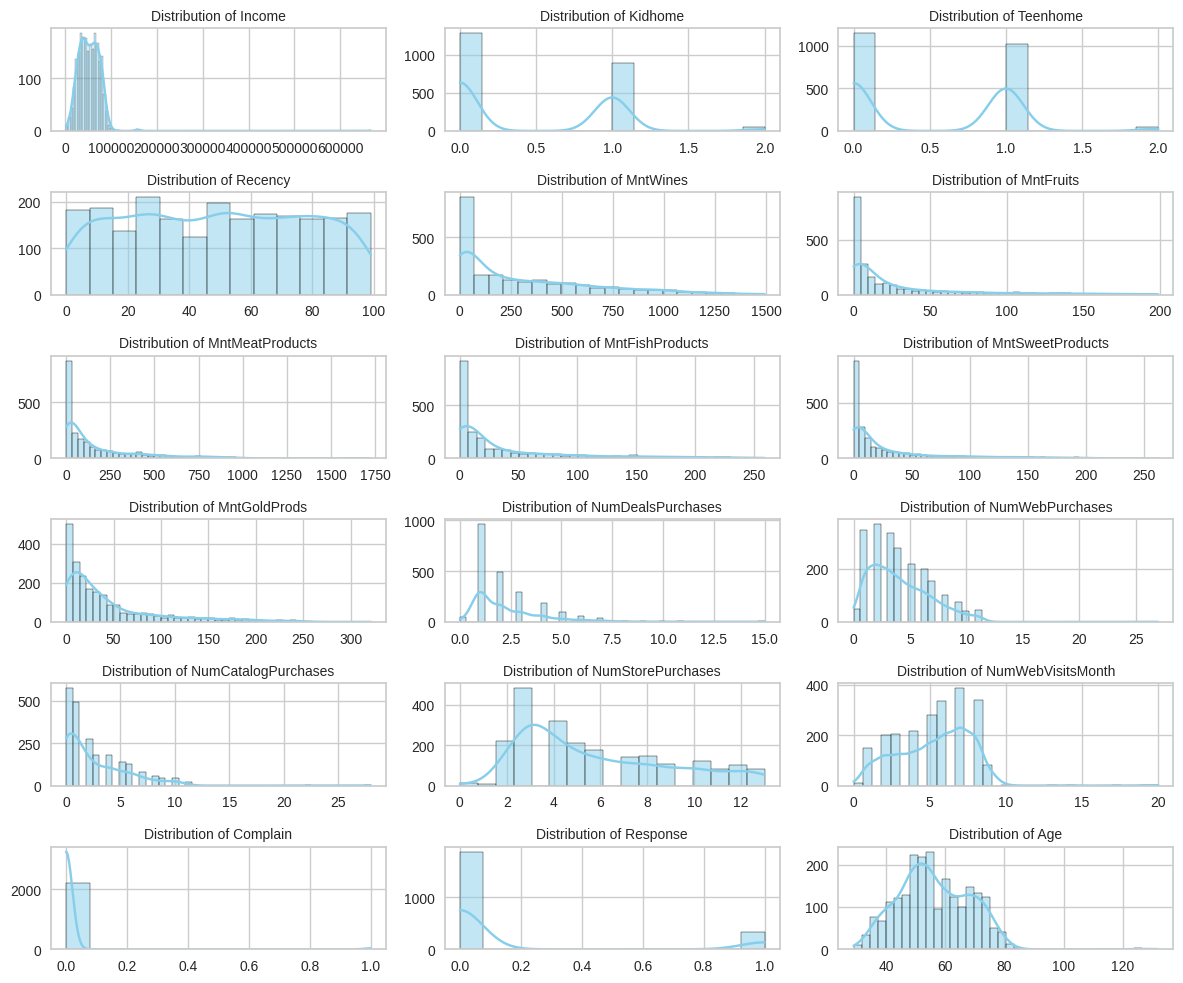

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 10))
#iterating through each column
for i, feature in enumerate(data.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(6, 3, i+1)  # Assign subplot
    sns.histplot(data=data, x=feature, kde=True, color='skyblue')  # Plot histogram with KDE
    plt.title(f'Distribution of {feature}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

#### PLotting the boxplot of each column.

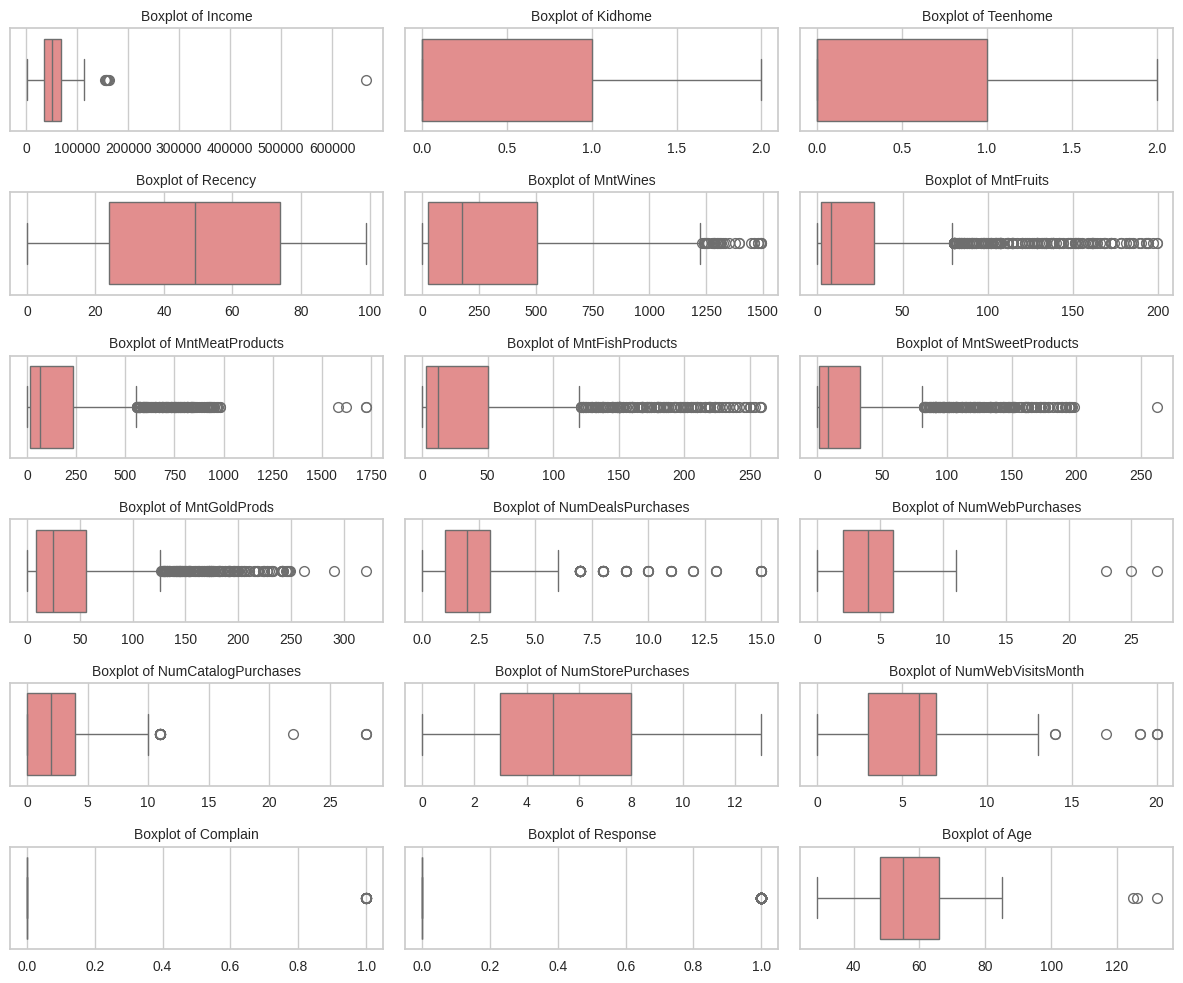

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(data.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(6, 3, i+1)  # Assign subplot
    sns.boxplot(data=data, x=feature, color='lightcoral')  # Plot boxplot
    plt.title(f'Boxplot of {feature}', fontsize=10)
    plt.xlabel('')

plt.tight_layout()
plt.show()

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

**Let's check for correlations.**

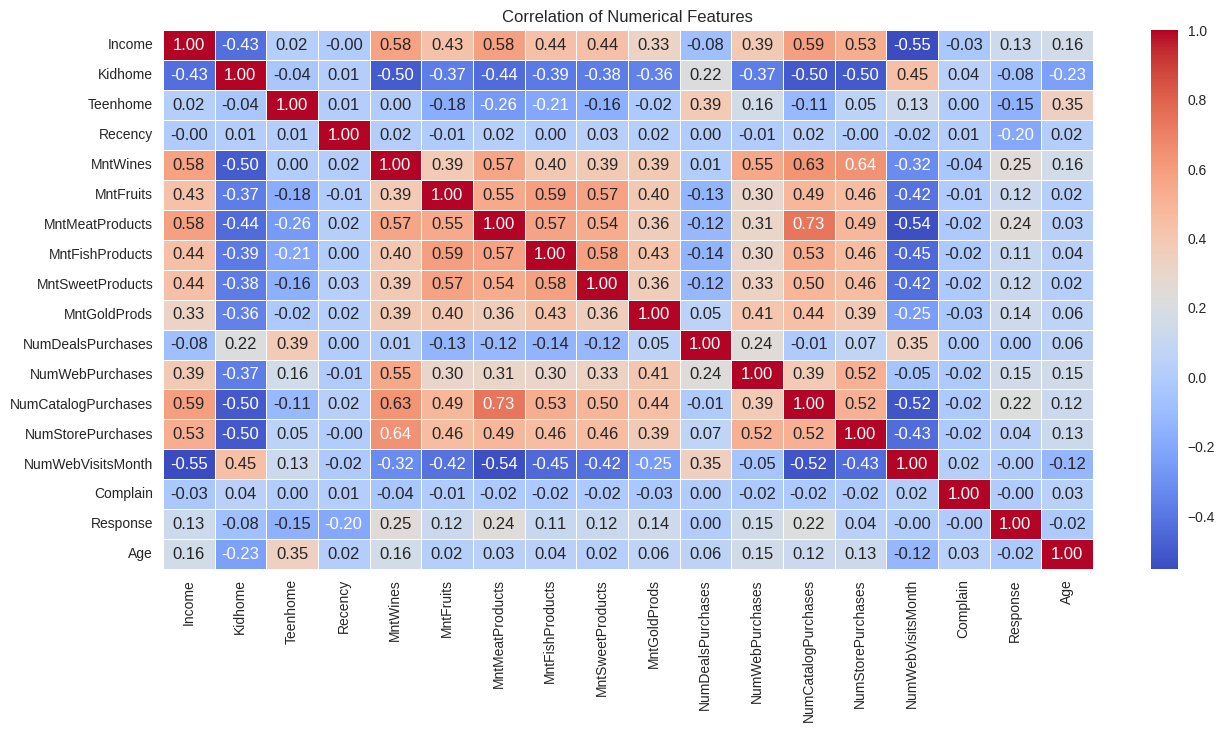

In [ ]:
plt.figure(figsize=(15, 7))

# Calculate the correlation matrix
corr_matrix = data.corr()

sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Numerical Features")
plt.show()

**Let's check for pairplots.**

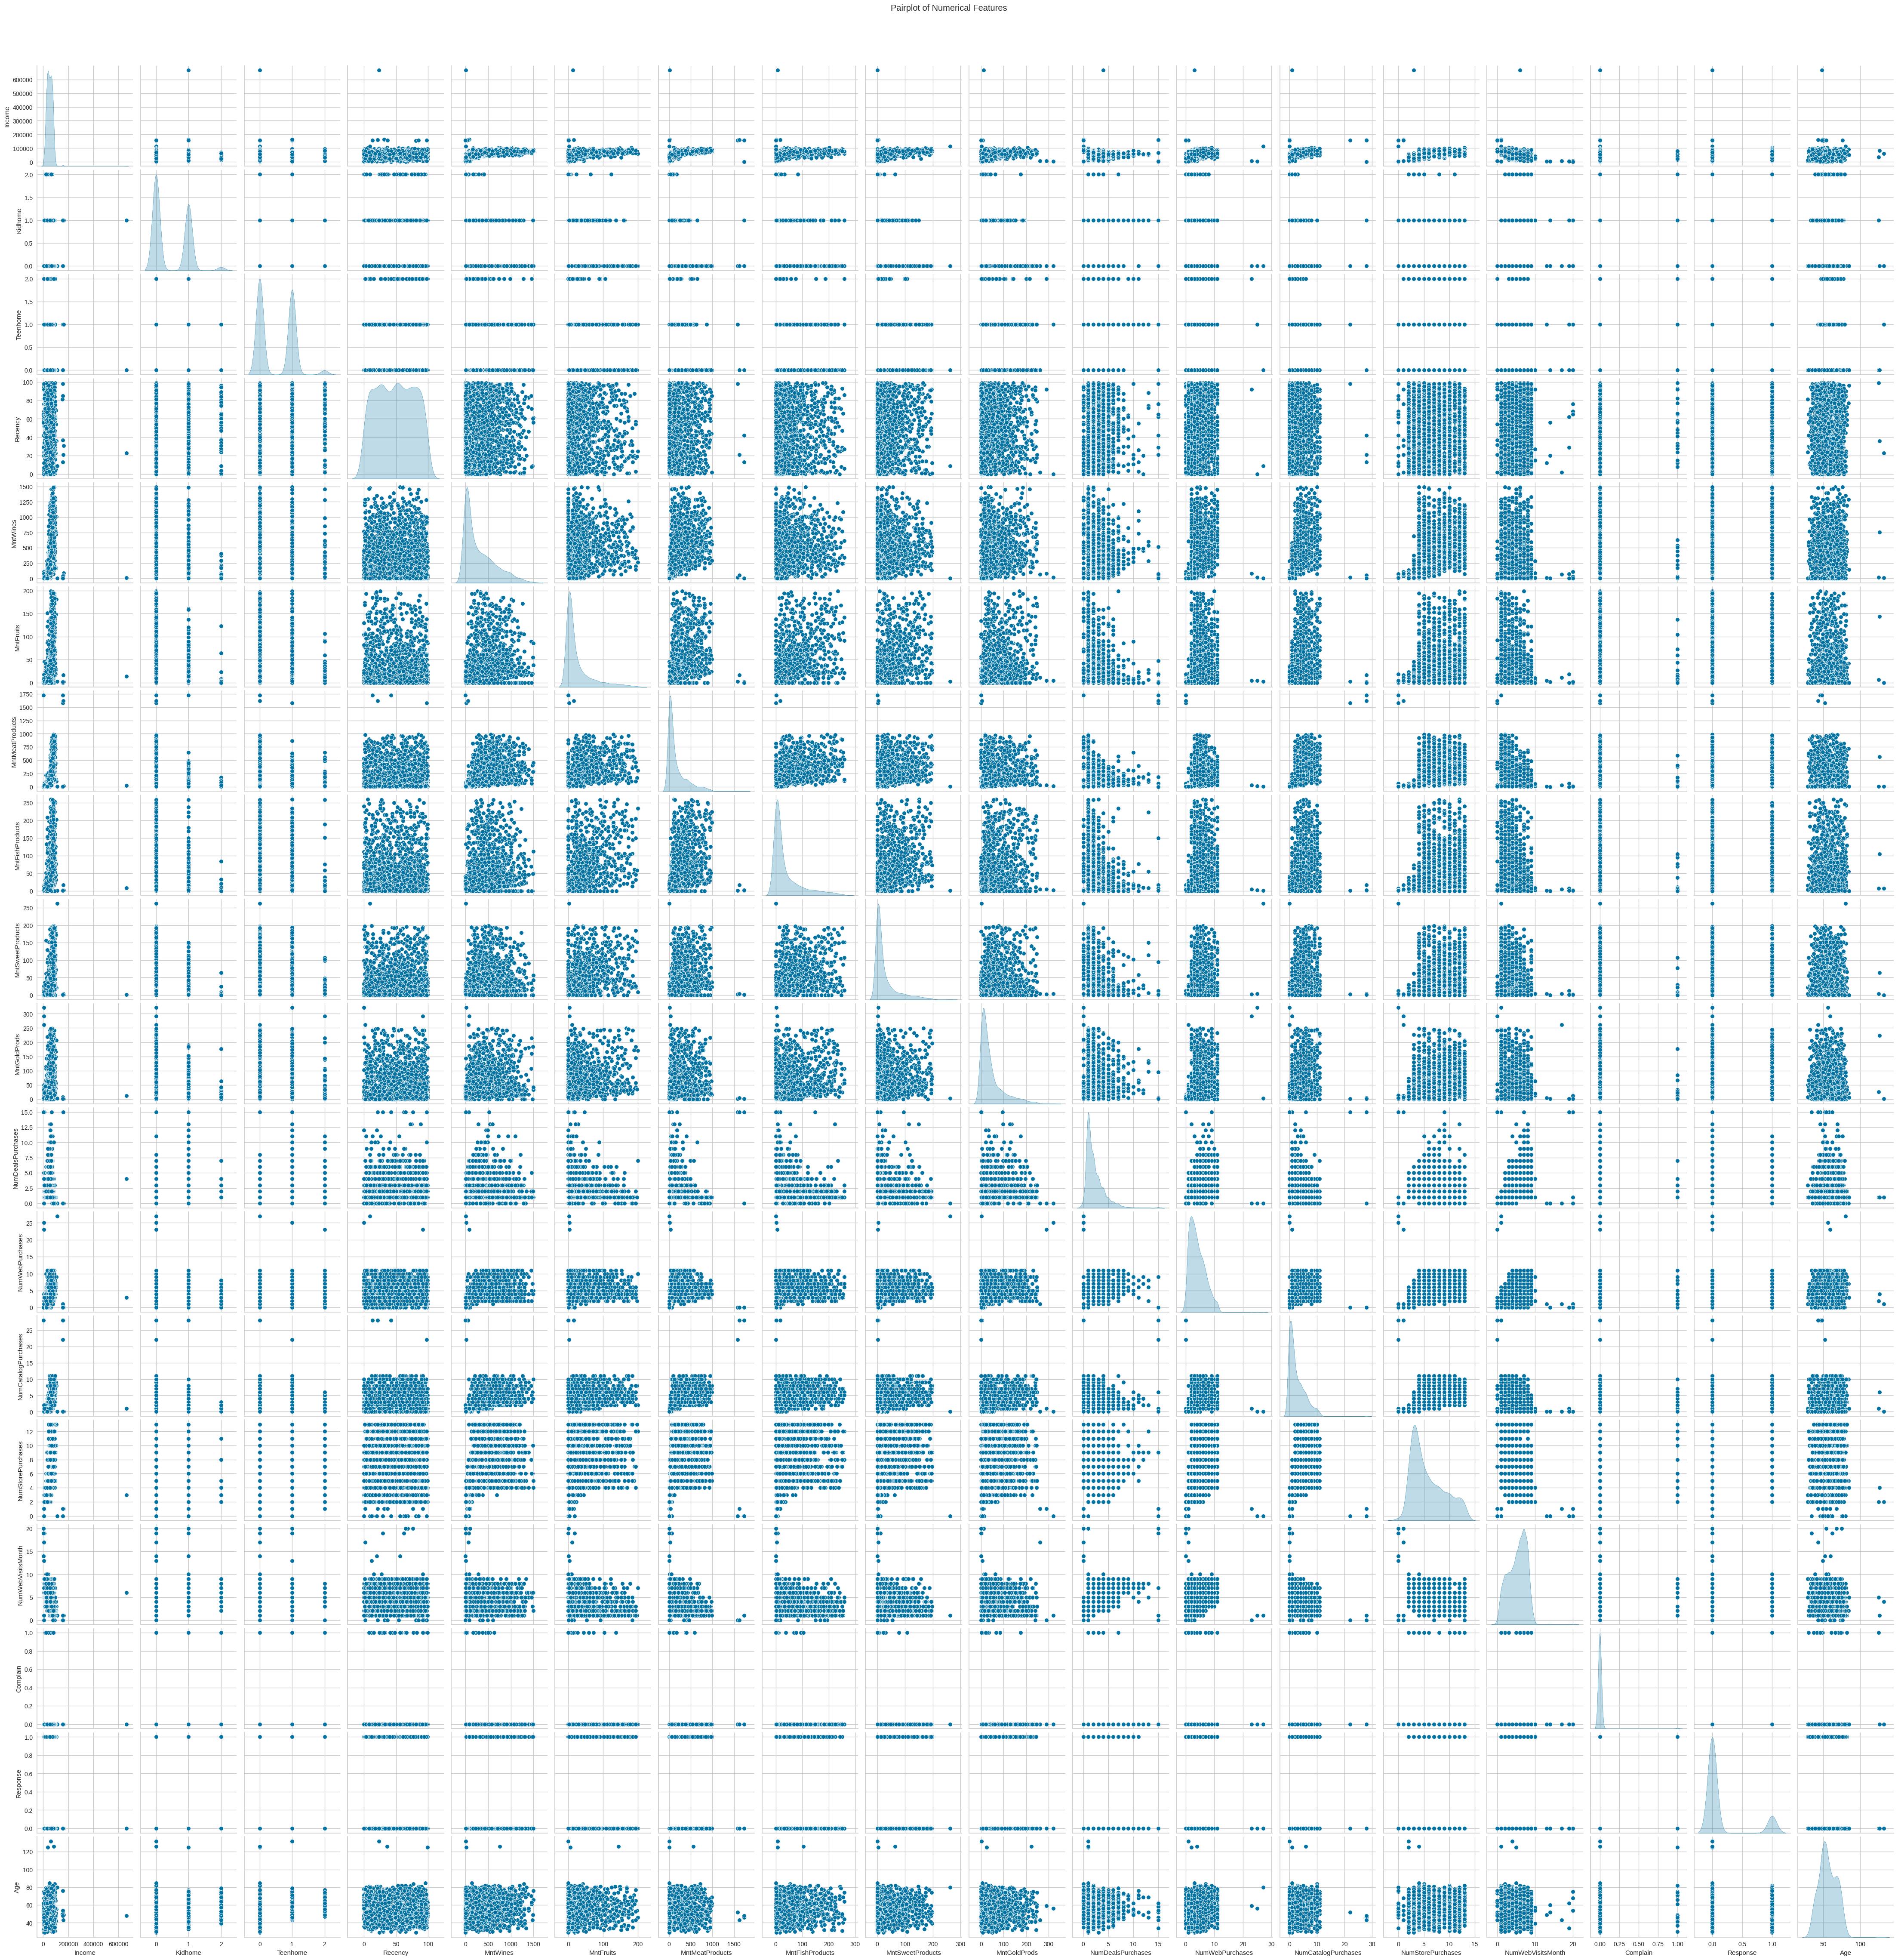

In [ ]:
# Create a pairplot
sns.pairplot(data=data.select_dtypes(include=['int64', 'float64']), diag_kind="kde")

plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

## **Data Preprocessing**

### Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = data.copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

## **K-means Clustering**

In [ ]:
k_means_data = subset_scaled_data.copy() # Do not change this code. This will be used later in cluster profiling

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

Number of Clusters: 2 	WCSS: 29127.70 	Silhouette Score: 0.2834
Number of Clusters: 3 	WCSS: 25873.79 	Silhouette Score: 0.2129
Number of Clusters: 4 	WCSS: 23749.54 	Silhouette Score: 0.2227
Number of Clusters: 5 	WCSS: 22862.10 	Silhouette Score: 0.1916
Number of Clusters: 6 	WCSS: 21681.77 	Silhouette Score: 0.1960
Number of Clusters: 7 	WCSS: 20746.06 	Silhouette Score: 0.1395
Number of Clusters: 8 	WCSS: 19996.86 	Silhouette Score: 0.1373
Number of Clusters: 9 	WCSS: 19239.07 	Silhouette Score: 0.1394
Number of Clusters: 10 	WCSS: 18489.21 	Silhouette Score: 0.1472


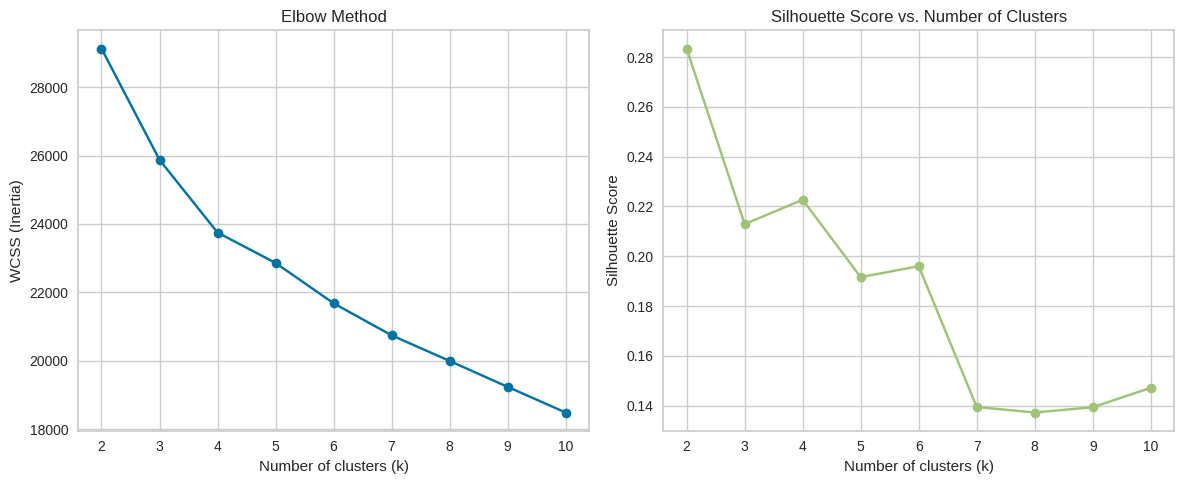

In [ ]:
#i think i can use Silhouette Score Check to choose (4 seems good)


clusters = range(2, 11)
wcss_k8 = []
silhouette_scores = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_means_data)

    wcss = model.inertia_
    wcss_k8.append(wcss)

    silhouette_avg = silhouette_score(k_means_data, model.labels_)
    silhouette_scores.append(silhouette_avg)

    print(f"Number of Clusters: {k} \tWCSS: {wcss:.2f} \tSilhouette Score: {silhouette_avg:.4f}")

# Plot Elbow Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(clusters, wcss_k8, "bx-", marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(clusters, silhouette_scores, "gx-", marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")

plt.tight_layout()
plt.grid(True)
plt.show()

#Based on Silhouette Score, the best number of clusters is k = 2 , anyway There’s a moderate “elbow” between k = 3 and k = 5

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

In [ ]:
#i did this in previous step , but there is no harm in repenting it
sil_score = []
cluster_list = range(2, 10)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)          # Initialize KMeans
    preds = clusterer.fit_predict(k_means_data)                        # Fit the model and get cluster labels
    score = silhouette_score(k_means_data, preds)                      # Compute silhouette score
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {:.4f}".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.2834
For n_clusters = 3, the silhouette score is 0.2129
For n_clusters = 4, the silhouette score is 0.2227
For n_clusters = 5, the silhouette score is 0.1916
For n_clusters = 6, the silhouette score is 0.1960
For n_clusters = 7, the silhouette score is 0.1395
For n_clusters = 8, the silhouette score is 0.1373
For n_clusters = 9, the silhouette score is 0.1394


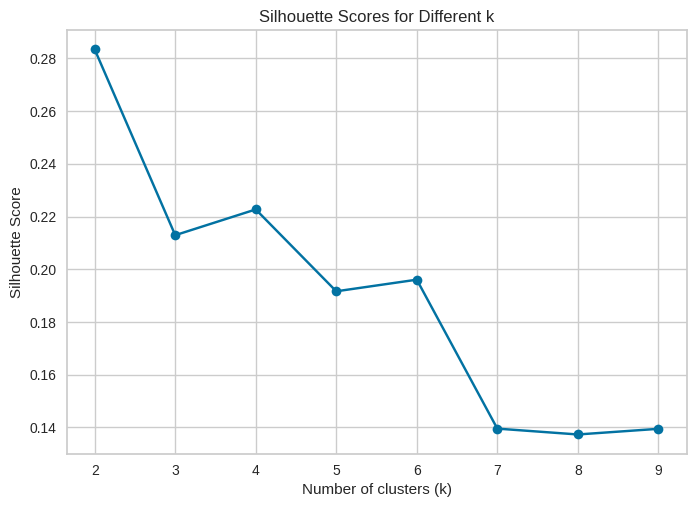

In [ ]:
plt.plot(cluster_list, sil_score, marker='o', linestyle='-')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [ ]:
#i will use 2 clusters , because Silhouette score peaks at k = 2
%%time
kmeans = KMeans(n_clusters=4, random_state=0)   # use the "optimal" k
kmeans.fit(k_means_data)

CPU times: user 8.42 ms, sys: 981 µs, total: 9.4 ms
Wall time: 9.79 ms


KMeans(n_clusters=4, random_state=0)

In [ ]:
# creating a copy of the original data
data1 = data.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_data["K_means_segments"] = kmeans.labels_
data1["K_means_segments"] = kmeans.labels_

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

**Let's create some plots on the original data to understand the customer distribution among the clusters in Kmeans.**

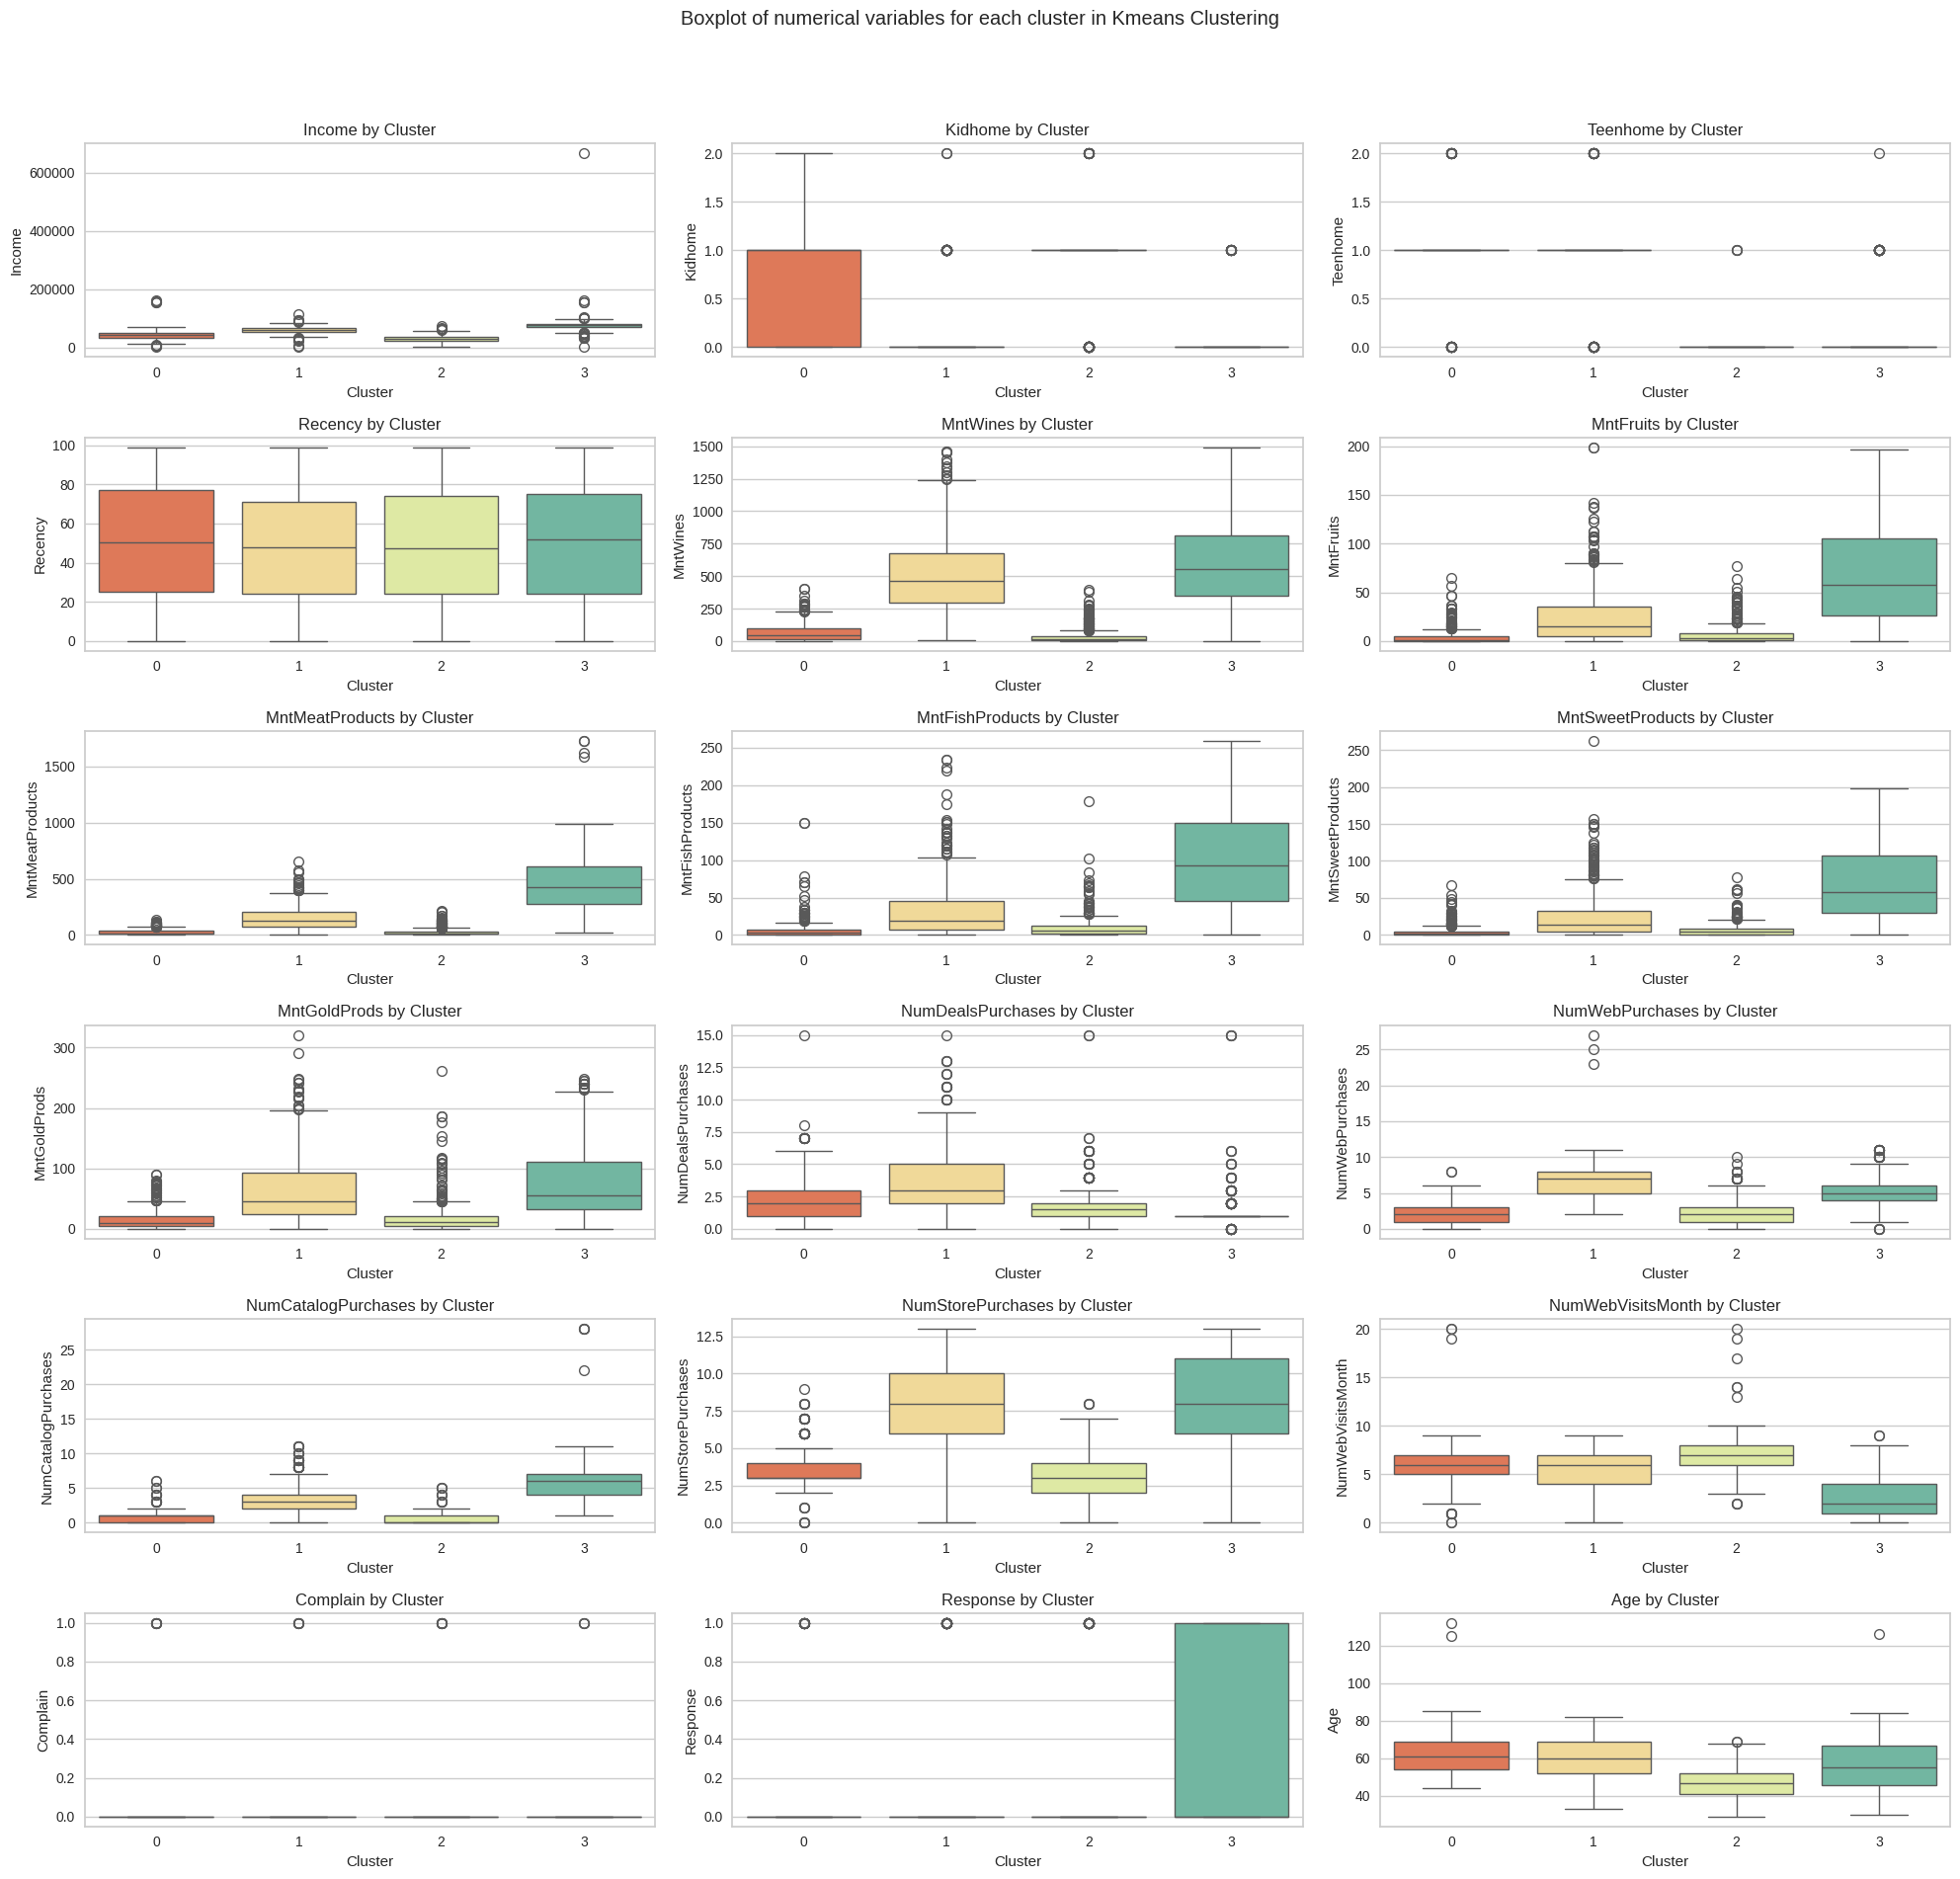

In [ ]:
plt.figure(figsize=(20, 20))  # Set the figure size for the plot
plt.suptitle("Boxplot of numerical variables for each cluster in Kmeans Clustering")  # Set the main title for the plot

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(data1.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(data=data1, x="K_means_segments", y=variable, palette='Spectral')
    plt.title(f'{variable} by Cluster')
    plt.xlabel("Cluster")
    plt.ylabel(variable)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusting the layout to fit title
plt.show()

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

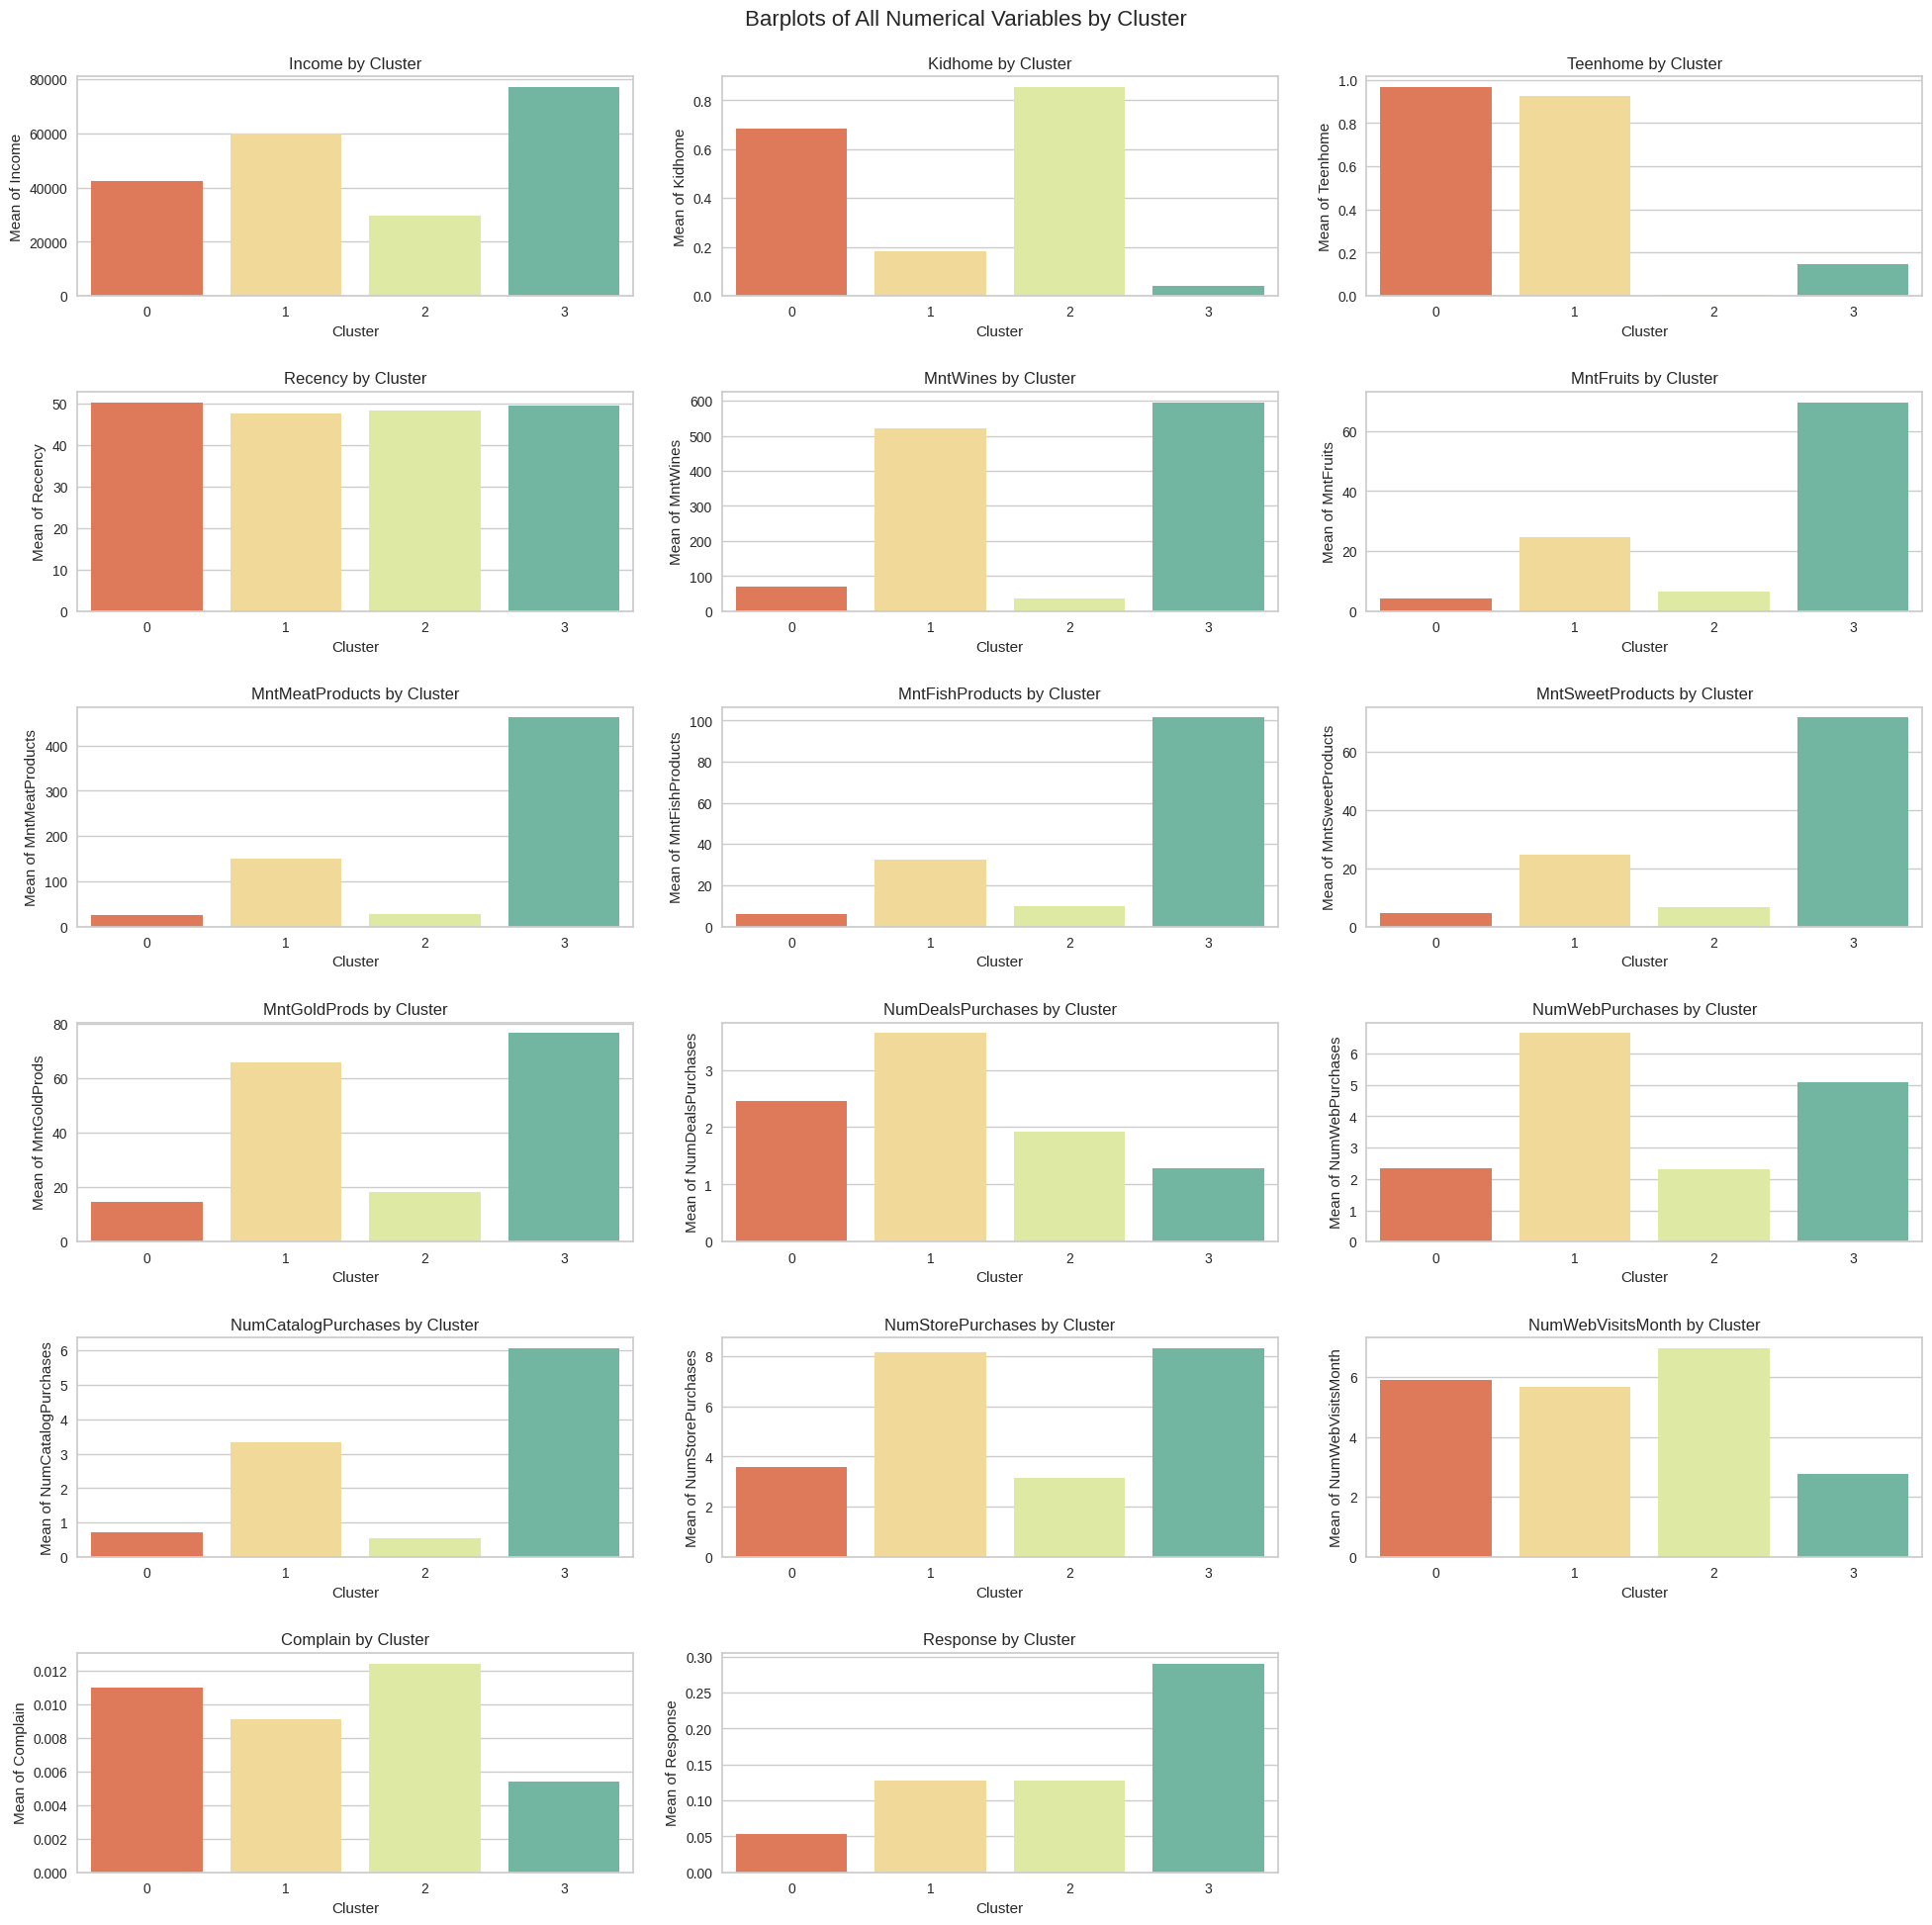

In [ ]:
plt.figure(figsize=(20, 20))  # Set the figure size
plt.suptitle("Barplots of All Numerical Variables by Cluster", fontsize=16)

# Plot mean values of each variable by cluster
for i, variable in enumerate(data.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)
    sns.barplot(data=data1, x="K_means_segments", y=variable, palette='Spectral', errorbar=None)
    plt.title(f'{variable} by Cluster')
    plt.xlabel("Cluster")
    plt.ylabel(f'Mean of {variable}')

plt.tight_layout(pad=2.0)
plt.show()

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

**for the business recommendations and more insights please check the basic presentation file on [GitHub](https://github.com/Nawafprojects01)**